<a href="https://colab.research.google.com/github/engrlakshmi/Basic-Python-Assignments/blob/main/Copy_of_EDA_Assignment1_Sree_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA to understand how consumer attributes and loan attributes influence the tendency of defaulters.

Identify patterns which indicate if a client has difficulty paying their
installments which may be used for taking actions such as:


*   denying the loan
*   reducing the amount of loan
*   lending (to risky applicants) at a higher interest rate

This will ensure that the consumers capable of repaying the loan are not rejected. 
Identification of such applicants using EDA is the aim of this case study.


1.   Identify the driving factors (or driver variables)behind loan default, i.e. the variables which are strong indicators of default. 
2.   Utilise the knowledge for company portfolio and risk assessment.



The various risk variables are:

1.   income level
2.   peer group
3.   adverse childhood experiences (ACEs)
4.   employment status
5.   clients with payment difficulties





This dataset has 3 files :
1. 'application_data.csv' contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.
2. 'previous_application.csv' contains information about the client’s previous loan data. 
It contains the data whether the previous application had been Approved, Cancelled, Refused
or Unused offer.
3. 'columns_description.csv' is a data dictionary which describes the meaning of the variables.

**RESULTS EXPECTED BY LEARNERS**
 

*   Present the overall approach of the analysis in a presentation. Mention the problem
statement and the analysis approach briefly.

*   Identify the missing data and use appropriate methods to deal with it. (Remove columns/or replace it with an appropriate value) 




Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


In [2]:
pip install scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Hint : Note that in EDA, since it is not necessary to replace the missing value, but if you have
to replace the missing value, what should be the approach. Clearly mention the approach.
● Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier.
Again, remember that for this exercise, it is not necessary to remove any data points.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_validate

● Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business
terms.


● Identify if there is data imbalance in the data. Find the ratio of data imbalance.
Hint : How will you analyse the data in case of data imbalance? You can plot more than one
type of plot to analyse the different aspects due to data imbalance. For example, you can
choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute
value. Do this analysis for the ‘Target variable’ in the dataset ( clients with payment difficulties
and all other cases). Use a mix of univariate and bivariate analysis etc.
Hint : Since there are a lot of columns, you can run your analysis in loops for the appropriate
columns and find the insights.


● Find the top 10 correlation for the Client with payment difficulties and all other cases
(Target variable). Note that you have to find the top correlation by segmenting the data frame
w.r.t to the target variable and then find the top correlation for each of the segmented data
and find if any insight is there. Say, there are 5+1(target) variables in a dataset: Var1, Var2,
Var3, Var4, Var5, Target. And if you have to find a top 3 correlation, it can be: Var1 & Var2,
Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a
categorical variable and not a continuous variable which is increasing or decreasing.


Reading the previous file

● Include visualisations and summarise the most important results in the presentation. You
are free to choose the graphs which explain the numerical/categorical variables. Insights
should explain why the variable is important for differentiating the clients with payment
difficulties with all other cases.

In [4]:
# To read the previous application
pre_df=pd.read_csv('/content/previous_application.csv')

In [5]:
pre_df

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233904,2002766,254498,Consumer loans,9903.780,70425.0,76234.5,0.0,70425.0,TUESDAY,16,...,Consumer electronics,10.0,high,POS household with interest,365243.0,-1145.0,-875.0,-905.0,-898.0,0.0
233905,1518563,435877,Consumer loans,10375.965,102465.0,92218.5,10246.5,102465.0,SUNDAY,19,...,Clothing,10.0,low_normal,POS industry with interest,365243.0,-1107.0,-837.0,-837.0,-830.0,0.0
233906,1153474,147278,Consumer loans,14378.535,106920.0,102577.5,10692.0,106920.0,SUNDAY,10,...,Clothing,8.0,low_normal,POS industry with interest,365243.0,-1437.0,-1227.0,-1227.0,-1223.0,0.0
233907,1383203,264970,Consumer loans,9930.510,98010.0,88209.0,9801.0,98010.0,MONDAY,17,...,Clothing,10.0,low_normal,POS industry with interest,365243.0,-1459.0,-1189.0,-1189.0,-1183.0,0.0


In [7]:
# To read the dictionary
#df1 = pd.read_csv('columns_description.csv')
#df1 = pd.read_csv('columns_description.csv', header=None, index_col=0, squeeze = True)
#d = dict('columns_description.csv')
#import csv
#with open('columns_description.csv', mode ='r')as file:
    #d=csv.reader(file)

    #for lines in d:
        #print(lines)
#import pandas as pd
#df1 = pd.read_csv('columns_description.csv', sep=";", encoding='cp1252')
#d = df1.to_dict()
   

In [9]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
pre_df.tail()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
233904,2002766,254498,Consumer loans,9903.780,70425.0,76234.5,0.0,70425.0,TUESDAY,16,...,Consumer electronics,10.0,high,POS household with interest,365243.0,-1145.0,-875.0,-905.0,-898.0,0.0
233905,1518563,435877,Consumer loans,10375.965,102465.0,92218.5,10246.5,102465.0,SUNDAY,19,...,Clothing,10.0,low_normal,POS industry with interest,365243.0,-1107.0,-837.0,-837.0,-830.0,0.0
233906,1153474,147278,Consumer loans,14378.535,106920.0,102577.5,10692.0,106920.0,SUNDAY,10,...,Clothing,8.0,low_normal,POS industry with interest,365243.0,-1437.0,-1227.0,-1227.0,-1223.0,0.0
233907,1383203,264970,Consumer loans,9930.510,98010.0,88209.0,9801.0,98010.0,MONDAY,17,...,Clothing,10.0,low_normal,POS industry with interest,365243.0,-1459.0,-1189.0,-1189.0,-1183.0,0.0
233908,2439834,300986,Consumer loans,7710.840,43645.5,43645.5,0.0,43645.5,SATURDAY,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Check the various attributes of data like shape (rows and cols)
pre_df.shape

(233909, 37)

In [12]:
#Name of columns
pre_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [13]:
# Checking the data types of all the columns
pre_df.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [14]:
# Check the descriptive statistics of numeric variables
pre_df.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,2.339090e+05,233909.000000,183502.000000,2.339090e+05,2.339090e+05,1.130850e+05,1.819840e+05,233909.000000,233909.000000,113085.000000,...,840.000000,233909.000000,2.339080e+05,183502.000000,142698.000000,142698.000000,142698.000000,142698.000000,142698.000000,142698.000000
mean,1.920603e+06,278602.315221,15598.465638,1.707390e+05,1.906835e+05,6.629416e+03,2.194931e+05,12.487125,0.996413,0.079560,...,0.779574,-895.663566,3.409363e+02,15.702717,343087.310159,13835.265435,32691.755995,76180.341084,81344.858898,0.325576
std,5.337031e+05,102788.696558,14600.342829,2.860543e+05,3.120494e+05,1.829181e+04,3.074087e+05,3.325714,0.059783,0.107334,...,0.099888,786.345242,1.179879e+04,14.224363,87315.604333,72478.699682,105364.085472,149371.898295,152887.664252,0.468591
min,1.000001e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,...,0.373150,-2922.000000,-1.000000e+00,0.000000,-2920.000000,-2892.000000,-2800.000000,-2888.000000,-2847.000000,0.000000
25%,1.458210e+06,189644.000000,6190.166250,2.060550e+04,2.514600e+04,0.000000e+00,4.945500e+04,10.000000,1.000000,0.000000,...,0.715645,-1337.000000,-1.000000e+00,6.000000,365243.000000,-1648.000000,-1268.000000,-1338.000000,-1295.000000,0.000000
50%,1.920391e+06,278893.000000,11002.905000,7.071750e+04,7.902450e+04,1.705500e+03,1.071450e+05,12.000000,1.000000,0.053046,...,0.835095,-594.000000,6.000000e+00,12.000000,365243.000000,-832.000000,-370.000000,-542.000000,-505.000000,0.000000
75%,2.382833e+06,367896.000000,20029.893750,1.800000e+05,2.025000e+05,7.735500e+03,2.250000e+05,15.000000,1.000000,0.108909,...,0.852537,-286.000000,1.000000e+02,24.000000,365243.000000,-409.000000,118.000000,-75.000000,-47.000000,1.000000
max,2.845382e+06,456255.000000,417927.645000,3.826372e+06,4.104351e+06,1.201500e+06,3.826372e+06,23.000000,1.000000,0.989740,...,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [15]:
pre_df.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                     50407
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_DOWN_PAYMENT               120824
AMT_GOODS_PRICE                 51925
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
RATE_DOWN_PAYMENT              120824
RATE_INTEREST_PRIMARY          233069
RATE_INTEREST_PRIVILEGED       233069
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                114025
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_

In [16]:
# To find the correlation between the variables before data cleaning
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corr_columns = corrFilter(pre_df, .7)
print('Columns having high correlation are: \n', corr_columns)

Columns having high correlation are: 
 DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION   -0.800871
AMT_ANNUITY         AMT_APPLICATION              0.810253
                    AMT_CREDIT                   0.817139
                    AMT_GOODS_PRICE              0.822237
DAYS_LAST_DUE       DAYS_TERMINATION             0.929199
AMT_APPLICATION     AMT_CREDIT                   0.976114
AMT_CREDIT          AMT_GOODS_PRICE              0.993368
AMT_APPLICATION     AMT_GOODS_PRICE              0.999876
SK_ID_PREV          SK_ID_PREV                        NaN
dtype: float64


In [17]:
# To find columns with missing values
columns_list=[]
for i in pre_df.columns:
  if pre_df[i].isnull().sum()>0:
    columns_list.append(i)
print('Columns having missing values are: \n', columns_list)

Columns having missing values are: 
 ['AMT_ANNUITY', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']


                          index          0
0                    SK_ID_PREV   0.000000
1                    SK_ID_CURR   0.000000
2            NAME_CONTRACT_TYPE   0.000000
3                   AMT_ANNUITY  21.549833
4               AMT_APPLICATION   0.000000
5                    AMT_CREDIT   0.000000
6              AMT_DOWN_PAYMENT  51.654276
7               AMT_GOODS_PRICE  22.198804
8    WEEKDAY_APPR_PROCESS_START   0.000000
9       HOUR_APPR_PROCESS_START   0.000000
10  FLAG_LAST_APPL_PER_CONTRACT   0.000000
11       NFLAG_LAST_APPL_IN_DAY   0.000000
12            RATE_DOWN_PAYMENT  51.654276
13        RATE_INTEREST_PRIMARY  99.640886
14     RATE_INTEREST_PRIVILEGED  99.640886
15       NAME_CASH_LOAN_PURPOSE   0.000000
16         NAME_CONTRACT_STATUS   0.000000
17                DAYS_DECISION   0.000000
18            NAME_PAYMENT_TYPE   0.000000
19           CODE_REJECT_REASON   0.000000
20              NAME_TYPE_SUITE  48.747590
21             NAME_CLIENT_TYPE   0.000000
22         

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


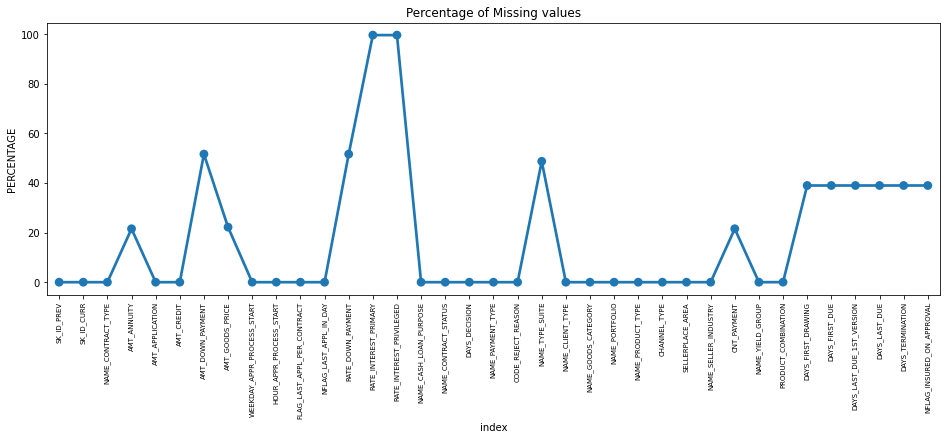

In [18]:
missing = pd.DataFrame((pre_df.isnull().sum())*100/pre_df.shape[0]).reset_index()
print(missing)
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

Missing Data - 

For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

AMT_ANNUITY       22.286665
AMT_DOWN_PAYMENT    53.636480
AMT_GOODS_PRICE    23.081773
RATE_DOWN_PAYMENT    53.636480
RATE_INTEREST_PRIMARY   99.643698
RATE_INTEREST_PRIVILEGED  99.643698
NAME_TYPE_SUITE           49.119754
CNT_PAYMENT             22.286366
PRODUCT_COMBINATION      0.020716
DAYS_FIRST_DRAWING      40.298129
DAYS_FIRST_DUE          40.298129
DAYS_LAST_DUE_1ST_VERSION  40.298129
DAYS_LAST_DUE          40.298129
DAYS_TERMINATION       40.298129
NFLAG_INSURED_ON_APPROVAL  40.298129
We can ignore PRODUCT_COMBINATION  as it is having very low value: 0.020716%.


# Data cleaning

Create a copy of base data for manupulation & processing

In [19]:
new_pre_df = pre_df.copy()
new_pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


Replace the missing value using 'fillna' ,'method = 'ffill' and 'mean'.

In [20]:
# Used mean method to fill the missing annuity amount,amt_down payment,RATE_DOWN_PAYMENT,AMT_GOODS_PRICE,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,
#DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
mean = new_pre_df['AMT_ANNUITY'].mean()
new_pre_df['AMT_ANNUITY'].fillna(mean, inplace = True)
mean1 = new_pre_df['AMT_DOWN_PAYMENT'].mean()
new_pre_df['AMT_DOWN_PAYMENT'].fillna(mean1, inplace = True)
mean2=new_pre_df['RATE_DOWN_PAYMENT'].mean()
new_pre_df['RATE_DOWN_PAYMENT'].fillna(mean2,inplace = True)
mean3=new_pre_df['AMT_GOODS_PRICE'].mean()
new_pre_df['AMT_GOODS_PRICE'].fillna(mean3,inplace = True)
mean4=new_pre_df['DAYS_FIRST_DUE'].mean()
new_pre_df['DAYS_FIRST_DUE'].fillna(mean4,inplace = True)

mean5=new_pre_df['DAYS_LAST_DUE_1ST_VERSION'].mean()
new_pre_df['DAYS_LAST_DUE_1ST_VERSION'].fillna(mean5,inplace = True)

mean6=new_pre_df['DAYS_FIRST_DRAWING'].mean()
new_pre_df['DAYS_FIRST_DRAWING'].fillna(mean6,inplace = True)

mean7=new_pre_df['DAYS_LAST_DUE'].mean()
new_pre_df['DAYS_LAST_DUE'].fillna(mean7,inplace = True)

mean7=new_pre_df['DAYS_LAST_DUE'].mean()
new_pre_df['DAYS_LAST_DUE'].fillna(mean7,inplace = True)

mean7=new_pre_df['DAYS_TERMINATION'].mean()
new_pre_df['DAYS_TERMINATION'].fillna(mean7,inplace = True)

#Used fillna method to fill the missing RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,
new_pre_df['RATE_INTEREST_PRIMARY'].fillna(0.195, inplace=True)
new_pre_df['RATE_INTEREST_PRIVILEGED'].fillna(0.867, inplace=True)
#Used mode to fill categorical values
#new_pre_df.fillna(new_pre_df.mode().iloc[0])
new_pre_df['NAME_TYPE_SUITE'].fillna(new_pre_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)
new_pre_df['CNT_PAYMENT'].fillna(new_pre_df['CNT_PAYMENT'].mode()[0],inplace=True)
new_pre_df['NAME_TYPE_SUITE'].fillna(new_pre_df['NAME_TYPE_SUITE'].mode()[0],inplace=True)
#Used mode to fill the DAYS_FIRST_DRAWING 
new_pre_df['DAYS_FIRST_DRAWING'].fillna(new_pre_df['DAYS_FIRST_DRAWING'].mode()[0],inplace=True)
#Used bfill method for NFLAG_INSURED_ON_APPROVAL
new_pre_df['NFLAG_INSURED_ON_APPROVAL'].fillna(method = 'bfill', inplace = True)

In [21]:
#Removing missing values 
new_pre_df.dropna(how = 'any', inplace = True)

In [22]:
def corrFilters(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

new_corr_columns = corrFilters(new_pre_df, .7)
print('Columns having high correlation after data cleaning are: \n', new_corr_columns)

Columns having high correlation after data cleaning are: 
 DAYS_FIRST_DRAWING  DAYS_LAST_DUE_1ST_VERSION   -0.800871
AMT_ANNUITY         AMT_APPLICATION              0.772066
                    AMT_CREDIT                   0.776595
                    AMT_GOODS_PRICE              0.810352
DAYS_LAST_DUE       DAYS_TERMINATION             0.929199
AMT_CREDIT          AMT_GOODS_PRICE              0.941065
AMT_APPLICATION     AMT_GOODS_PRICE              0.947728
                    AMT_CREDIT                   0.976112
SK_ID_PREV          SK_ID_PREV                        NaN
dtype: float64


In [23]:
new_pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.000000,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.000000,-42.000000,300.000000,-42.000000,-37.000000,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,6629.415616,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.000000,-134.000000,916.000000,365243.000000,365243.000000,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,6629.415616,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.000000,-271.000000,59.000000,365243.000000,365243.000000,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,6629.415616,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.000000,-482.000000,-152.000000,-182.000000,-177.000000,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,6629.415616,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,343087.310159,13835.265435,32691.755995,76180.341084,81344.858898,1.0


# Feature Selection

In [24]:
new_pre_df.corr()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
SK_ID_PREV,1.000000,0.002138,0.008707,0.004794,0.005387,-0.003485,0.014042,0.000216,-0.003499,-0.005196,...,-0.001380,0.014399,0.002383,0.010607,-0.003177,0.000186,0.003018,0.001349,0.001535,0.005008
SK_ID_CURR,0.002138,1.000000,0.001168,0.001596,0.000972,0.000206,0.002165,0.004052,0.002227,0.000816,...,-0.005699,0.001742,0.001157,-0.000855,0.001003,0.002353,-0.000603,-0.000275,-0.000048,0.002301
AMT_ANNUITY,0.008707,0.001168,1.000000,0.772066,0.776595,0.113597,0.810352,-0.032589,0.019277,-0.053502,...,0.027224,0.249587,-0.009721,0.386893,0.038576,-0.046290,-0.054195,0.067738,0.057324,0.208510
AMT_APPLICATION,0.004794,0.001596,0.772066,1.000000,0.976112,0.112090,0.947728,-0.017002,0.001253,-0.018869,...,0.012884,0.135722,-0.003565,0.675112,0.043394,-0.032530,-0.050879,0.115727,0.100773,0.133665
AMT_CREDIT,0.005387,0.000972,0.776595,0.976112,1.000000,0.062870,0.941065,-0.023725,-0.026250,-0.041785,...,0.015377,0.136775,-0.004881,0.668988,-0.026878,-0.000547,0.029522,0.146973,0.141262,0.138268
AMT_DOWN_PAYMENT,-0.003485,0.000206,0.113597,0.112090,0.062870,1.000000,0.118247,0.014585,0.000627,0.529024,...,-0.010767,-0.025002,0.001670,0.008435,0.000963,-0.006352,-0.001703,-0.023934,-0.023208,-0.020217
AMT_GOODS_PRICE,0.014042,0.002165,0.810352,0.947728,0.941065,0.118247,1.000000,-0.041832,-0.014327,-0.019906,...,0.020691,0.252463,-0.008546,0.648069,-0.028513,-0.008463,0.025437,0.143250,0.142461,0.170698
HOUR_APPR_PROCESS_START,0.000216,0.004052,-0.032589,-0.017002,-0.023725,0.014585,-0.041832,1.000000,0.006058,0.015183,...,-0.018977,-0.037334,0.014590,-0.042870,0.011110,-0.003438,-0.012778,-0.011982,-0.012043,-0.089685
NFLAG_LAST_APPL_IN_DAY,-0.003499,0.002227,0.019277,0.001253,-0.026250,0.000627,-0.014327,0.006058,1.000000,0.001547,...,-0.002371,0.016690,0.000802,0.058253,0.001780,0.000990,-0.001146,-0.001573,-0.001650,-0.003440
RATE_DOWN_PAYMENT,-0.005196,0.000816,-0.053502,-0.018869,-0.041785,0.529024,-0.019906,0.015183,0.001547,1.000000,...,-0.039028,-0.161350,-0.005936,-0.093848,0.007815,-0.020866,-0.012369,-0.098050,-0.096862,-0.014080


# Data exploration

In [25]:
Contract_types = new_pre_df.groupby(['NAME_CONTRACT_TYPE'],as_index=True).count()
Contract_types
#new_pre_df['NAME_CONTRACT_TYPE'].value_counts()


,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
NAME_CONTRACT_TYPE,,,,,,,,,,,,,,,,,,,,,
Cash loans,100201,100201,100201,100201,100201,100201,100201,100201,100201,100201,...,100201,100201,100201,100201,100201,100201,100201,100201,100201,100201
Consumer loans,106939,106939,106939,106939,106939,106939,106939,106939,106939,106939,...,106939,106939,106939,106939,106939,106939,106939,106939,106939,106939
Revolving loans,26723,26723,26723,26723,26723,26723,26723,26723,26723,26723,...,26723,26723,26723,26723,26723,26723,26723,26723,26723,26723


In [ ]:
for i, predictor in enumerate(new_pre_df.drop(columns=['SK_ID_PREV','DAYS_LAST_DUE','DAYS_TERMINATION','AMT_CREDIT','AMT_APPLICATION','AMT_CREDIT'])):
    plt.figure(i)
    sns.countplot(data=new_pre_df, x=predictor, hue='AMT_ANNUITY')

In [ ]:
pd.crosstab(new_pre_df.AMT_ANNUITY, new_pre_df.AMT_GOODS_PRICE)